# Solving the 1-D Eigenvalue Equation  
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E \psi $$  
## Reduction to dimensionless form  
 Assume natural length scale $l_0$. Let $x=l_0 y$. Substituting gives  
 $$ -\frac{\hbar^2}{2ml_0^2} \frac{d^2\psi}{dy^2} + V(x)\psi = E \psi $$  
 Use $E_0 = \hbar^2/2ml_0^2$ as a natural energy scale. Dividing throughout by $E_0$ gives  
  $$ -\frac{d^2\psi}{dy^2} + U(y)\psi = \epsilon \psi $$  
  where $U(y)=V(l_0 y)/E_0$ and $\epsilon=E/E_0$. The wavefunction satisfies the constraint  
  $$ \int dx |\psi|^2 = 1 $$.  
  We define a dimensionless wavefunction $\phi = \sqrt{l_0}\times \psi$. This 
  satisfies  
  $$ \int dy |\phi|^2 = 1 $$.
  
## Discretization  
We assume that $x \in [-L,L]$. Then, $y \in [-\tilde{L},\tilde{L}]$ where $\tilde{L}=L/l_0$.  
Divide the interval $[-\tilde{L},\tilde{L}]$ into $N$ segments with lattice points labelled by an 
integer $i$ such that $y_i = i\times \Delta$ where $\Delta = 2\tilde{L}/N$. Using the symmetric difference for the 
second derivative in the eigenvalue equation gives (at $y_i$)  
$$-\frac{1}{\Delta^2}\left(\phi_{i+1}-2\phi_i+\phi_{i-1}\right) + U_i \phi_i = \epsilon \phi_i $$  
This equation can be cast in the matrix form  
$$H \phi = \epsilon \phi $$
where the matrix $H$ has elements  
$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  
At this point, the eigenvalues and eigenvectors of $H$ can be determined using numpy.  
The normalization constraint on the eigenvectors $\phi$ is  
 $$ \int dy |\phi|^2 = 1 $$  
 which, in discrete form, reduces to
 $$ \Delta \sum_i |\phi_i|^2 = 1 $$

In [5]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [6]:
delta = 0.01   ## Lattice spacing. ## Lattice extends from x = -20.0 to +20.0
N = 1000
x = np.arange(-10.,10.+delta,delta)

In [7]:
def kronecker(i,j):
    return 1 if i==j else 0

v0 = 40.0 ## Potential depth
def V(z):
    if abs(z) < 2:
      if abs(z) > 1:

        return -v0
      else:
        return -v0/2 # decrease 2 to get shallow wells and observe coupling
    else:
        return 0


def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

def V2(z): #asym potential, notice how the wave fns are no longer even or odd
    if abs(z) < 2:
      if z < -1.3 :

        return -v0

      elif z> 0.3:
        return -v0
       
      else:
        return -v0/2
    else:
        return 0

def h2(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V2(delta*i) * kronecker(i,j)

def V3(z):
    if abs(z) < 2: #potential warying with x but still even
      return -abs(v0*z)

    else:
        return 0

def h3(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V3(delta*i) * kronecker(i,j)


def Vharmonic(z,k):
  return (k*(z**2))/2

def h4(i,j, k):
  return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + Vharmonic(delta*i,k) * kronecker(i,j)

def Vanharmonic(z,k1,k2):
  return (k1*(z**2) + k2*(z**4))/2

def h5(i,j, k1,k2):
  return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + Vanharmonic(delta*i,k1,k2) * kronecker(i,j)


def V7(z,n):
  return z**n

def h7(i,j,n):
  return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V7(delta*i,n) * kronecker(i,j)




In [8]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [9]:
potential = np.array( [0.003*V(delta*i) for i in range(-N,N+1)])

In [10]:
psi_0 = H_eigenvectors[:,0] # Ground state wavefunction
psi_1= H_eigenvectors[:,1]
psi_2= H_eigenvectors[:,2]

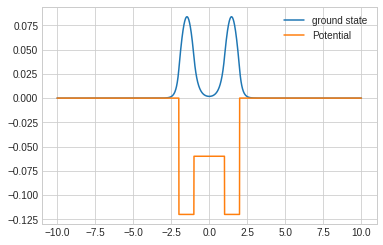

In [13]:
plt.plot(x, -psi_0, label="ground state")
#plt.plot(x, psi_1, label="First excited state")
#plt.plot(x, psi_2, label="Second excited state")
plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
energy_eigenvalue = H_eigenvalues[3]
print(energy_eigenvalue) 

-21.34758993507346


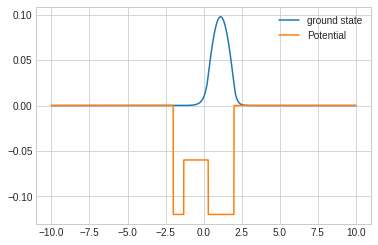

In [ ]:
H = np.array( [[h2(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

potential2 = np.array( [0.003*V2(delta*i) for i in range(-N,N+1)])

psi_0 = H_eigenvectors[:,0] # Ground state wavefunction
psi_1= H_eigenvectors[:,1]
psi_2= H_eigenvectors[:,2]

plt.plot(x, -psi_0, label="ground state")
#plt.plot(x, psi_1, label="First excited state")
#plt.plot(x, psi_2, label="First excited state")
plt.plot(x, potential2, label="Potential")
plt.legend();

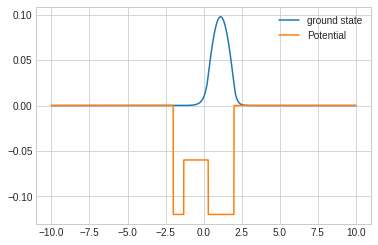

In [ ]:
plt.plot(x, -psi_0, label="ground state")
#plt.plot(x, psi_1, label="First excited state")
#plt.plot(x, psi_2, label="First excited state")
plt.plot(x, potential2, label="Potential")
plt.legend();

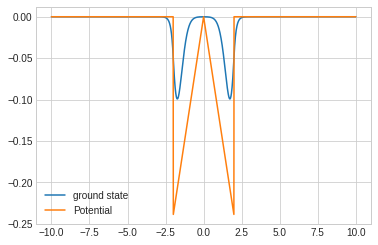

In [ ]:
H = np.array( [[h3(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

potential3 = np.array( [0.003*V3(delta*i) for i in range(-N,N+1)])

psi_0 = H_eigenvectors[:,0] # Ground state wavefunction
psi_1= H_eigenvectors[:,1]
psi_2= H_eigenvectors[:,2]

plt.plot(x, -psi_0, label="ground state")
#plt.plot(x, psi_1, label="First excited state")
#plt.plot(x, psi_2, label="First excited state")
plt.plot(x, potential3, label="Potential")
plt.legend();

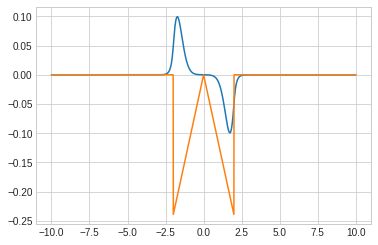

In [ ]:
plt.plot(x, psi_1, label="First excited state")
plt.plot(x, potential3, label="Potential")


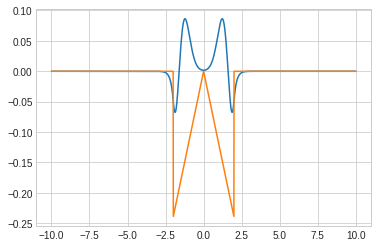

In [ ]:
plt.plot(x, psi_2, label="First excited state")
plt.plot(x, potential3, label="Potential")

In [ ]:
#observing a lotttt of energy levels
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

potential = np.array( [0.003*V(delta*i) for i in range(-N,N+1)])



In [ ]:
psi_04 = H_eigenvectors[:,0] # Ground state wavefunction
psi_14= H_eigenvectors[:,1] +0.1
psi_24= H_eigenvectors[:,2]+0.2
psi_34= H_eigenvectors[:,3]+0.3
psi_44= H_eigenvectors[:,4]+0.4
psi_54= H_eigenvectors[:,5]+0.5

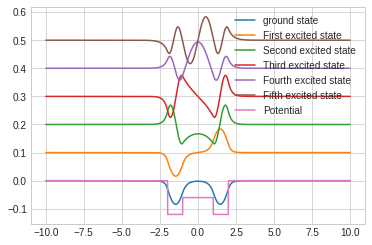

In [ ]:

plt.plot(x, psi_04, label="ground state")
plt.plot(x, psi_14, label="First excited state")
plt.plot(x, psi_24, label="Second excited state")
plt.plot(x, psi_34, label="Third excited state")
plt.plot(x, psi_44, label="Fourth excited state")
plt.plot(x, psi_54, label="Fifth excited state")

plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
# for different stepsize

def step_change(delta, level):
  ## Lattice spacing. ## Lattice extends from x = -20.0 to +20.0
  N = 1000
  x = np.arange(-10.,10.+delta,delta)

  H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
  H_eigenvalues, H_eigenvectors = lin.eig(H)
  idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
  H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
  H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

  potential = np.array( [0.003*V(delta*i) for i in range(-N,N+1)])

  psi = H_eigenvectors[:,level] 
  return psi

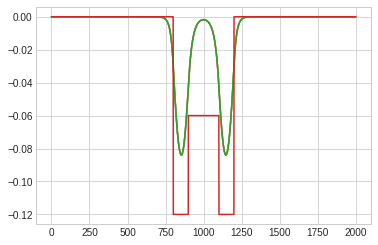

In [ ]:
plt.plot(step_change(0.05, 0))
plt.plot(step_change(0.01, 0))
plt.plot(step_change(0.005, 0))

plt.plot( potential, label="Potential")

In [ ]:
# for harmonic oscillator
def harmonic (delta, k, level):
  N = 1000
  x = np.arange(-10.,10.+delta,delta)

  H = np.array( [[h4(i,j,k) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
  H_eigenvalues, H_eigenvectors = lin.eig(H)
  idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
  H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
  H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

  psi = H_eigenvectors[:,level] 
  #Energy = H_eigenvalues[level]

  return x, psi , H_eigenvalues


potential_harmonic = np.array( [0.003*Vharmonic(delta*i,1) for i in range(-N,N+1)])



In [ ]:
k =1.0 #sping constany
x , psi05, H_eigenvaluesh = harmonic (0.01, k, 0)
x , psi15, H_eigenvaluesh = harmonic (0.01, k, 1)
x , psi25, H_eigenvaluesh = harmonic (0.01, k, 2)


psi05 = psi05 + 0.1*H_eigenvaluesh[0]
psi15 = psi15 + 0.1*H_eigenvaluesh[1]
psi25 = psi25 + 0.1*H_eigenvaluesh[2]



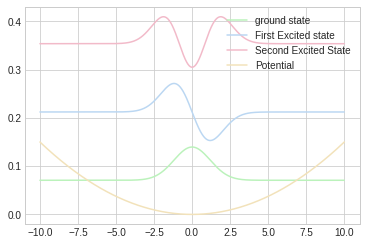

In [ ]:

plt.plot(x, psi05,'#BBF2BB', label="ground state")
plt.plot(x, psi15,'#BBD7F2' ,label="First Excited state")
plt.plot(x, psi25,'#F2BAC9' ,label="Second Excited State")

plt.plot( x,potential_harmonic,'#F2E2BA', label="Potential")
plt.legend();

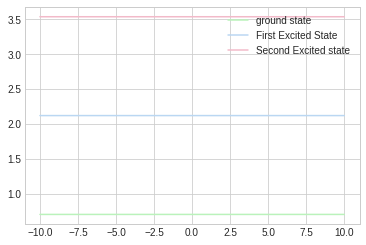

In [ ]:
# energies
Energy0_plot = np.array( [H_eigenvaluesh[0] for i in range(-N,N+1)] )
Energy1_plot = np.array( [H_eigenvaluesh[1] for i in range(-N,N+1)] )
Energy2_plot = np.array( [H_eigenvaluesh[2] for i in range(-N,N+1)] )

plt.plot(x, Energy0_plot, '#BAF2BB',label="ground state")
plt.plot(x, Energy1_plot, '#BAD7F2',label="First Excited State")
plt.plot(x, Energy2_plot, '#F2BAC9',label="Second Excited state")

plt.legend();

In [ ]:
# for anharmonic oscillator
def anharmonic (delta, k1, k2,level):
  N = 1000
  x = np.arange(-10.,10.+delta,delta)

  H = np.array( [[h5(i,j,k1,k2) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
  H_eigenvalues, H_eigenvectors = lin.eig(H)
  idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
  H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
  H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

  psi = H_eigenvectors[:,level] 
  Energy = H_eigenvalues[level]

  return x, psi , H_eigenvalues




In [ ]:
k1 = 1.0
k2 =0.1
potential_anharmonic = np.array( [0.003*Vanharmonic(delta*i,k1,k2) for i in range(-N,N+1)])


x , psi06, Energyanh = anharmonic (0.01, k1,k2, 0)
x , psi16, Energyanh = anharmonic (0.01, k1,k2, 1)
x , psi26, Energyanh = anharmonic (0.01, k1,k2, 2)


psi06 = psi06 + 0.1*Energyanh[0]
psi16 = psi16 + 0.1*Energyanh[1]
psi26 = psi26 + 0.1*Energyanh[2]


In [ ]:

plt.plot(x, psi06,'#BBF2BB', label="ground state")
plt.plot(x, psi16,'#BBD7F2' ,label="First Excited state")
plt.plot(x, psi26,'#F2BAC9' ,label="Second Excited State")

#plt.plot( x,potential_anharmonic,'#F2E2BA', label="Potential")
plt.legend();

In [ ]:

plt.plot(H_eigenvaluesh[:],'#BBF2BB', label = 'harmonic oscillator')
plt.plot(Energyanh[:],'#BBD7F2', label = 'Anharmonic oscillator')
plt.legend();
plt.xlim(0,50)
plt.ylim(0,50)

In [ ]:
def xn (delta,n,level):
  N = 1000
  x = np.arange(-10.,10.+delta,delta)

  H = np.array( [[h7(i,j,n) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
  H_eigenvalues, H_eigenvectors = lin.eig(H)
  idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
  H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
  H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

  psi = H_eigenvectors[:,level] 
  Energy = H_eigenvalues[level]

  return x, psi , H_eigenvalues

In [ ]:

Energy7 = np.zeros(100)
for i in range (0,100):
  x , psi, H_eigenvalues7 = xn(0.01,i,0)
  Energy7[i] = H_eigenvalues7[0]

In [ ]:
psi.conj().T
np.dot(psi.conj().T, psi)

1.0000000000000002

In [ ]:
plt.scatter(Energy7)
plt.xlim(0,10)
plt.ylim(-10,10)

In [ ]:
Energy0 - Energy1

In [ ]:
Energy1 - Energy2

In [ ]:
Energyanh[2]